# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Extração de Região de Interesse (ROI)

Dessa vez você vai criar uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

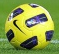

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

(342, 548, 3)


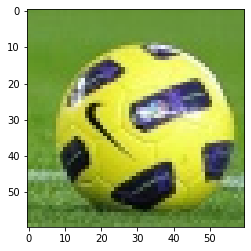

In [ ]:
def crop(img, x, y, largura, altura):
  return img[x:x+largura, y:y+altura, 0:3]
  

img = cv2.imread("messiimg.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
cropped = crop(img, 280, 330, 60, 60)
plt.imshow(cropped)

# 2. Colar Imagem

Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

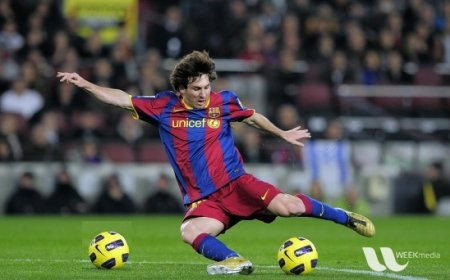

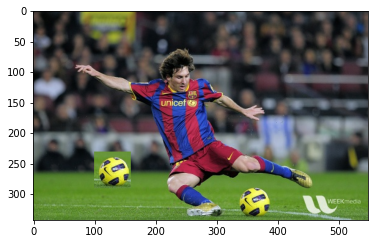

In [ ]:
def paste(destImg, srcImg, x, y):
  rows, lines, channels = srcImg.shape
  for i in range(0, rows):
    for j in range(0, lines):
      destImg[y+i][x+j] = srcImg[i][j]
  return destImg

newImg = img
newImg = paste(img, cropped, 100, 230)
plt.imshow(newImg)

# 3. Trabalhando com Canais de Cores

Dessa vez, você deverá criar um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

Preparando o ambiente

In [ ]:
# Carregando a imagem
img = cv2.imread("messiimg.jpg")

# Pega a geometria da imagem
lines, rows, channels = img.shape

# Imagem que receberá cada canal
red = np.zeros((rows, lines, 1))
green = np.zeros((rows, lines, 1))
blue = np.zeros((rows, lines, 1))

In [ ]:
# Copia os dados do canal (channel) da imagem(src) para outra (res)
def getChannel(res, channel, src):
  global lines, rows
  for i in range(0, rows):
    for j in range(0, lines):
      res[i][j] = src[j][i][channel]

# Pega a média de cada canal
def getAvarage(channel):
  global lines, rows
  sum = 0
  for i in range(0, rows):
    for j in range(0, lines):
      sum = sum + channel[i][j]
  return sum/(rows * lines)

In [ ]:
getChannel(red, 0, img)
getChannel(green, 1, img)
getChannel(blue, 2, img)

redAvarege = getAvarage(red)
greenAvarege = getAvarage(green)
blueAvarege = getAvarage(blue)

if (redAvarege > greenAvarege and redAvarege > blueAvarege):
  print("Imagem predominantemente vermelha!")

if (greenAvarege > redAvarege and greenAvarege > blueAvarege):
  print("Imagem predominantemente verde!")

if (blueAvarege > redAvarege and blueAvarege > greenAvarege):
  print("Imagem predominantemente azul!")

Imagem predominantemente verde!


# 4. Criando o ouriço brasileiro

Existe um jogo na Internet chamado "Brasonic", que consiste numa versão tupiniquim do ouriço mais popular dos jogos, Sonic. Basicamente, ele é uma versão do personagem trocando suas cores pelo verde e amarelo da bandeira nacional.

Nesse exercício, você deverá fazer um algoritmo que "recebe" uma imagem do Sonic e "troca" suas cores para o verde e amarelo. Para tal, modifique os pixels e salve a nova imagem em disco!

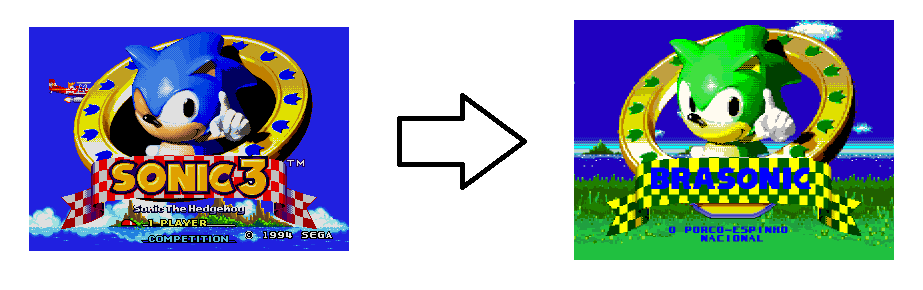

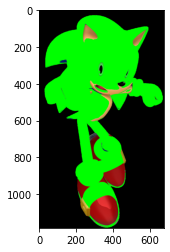

In [ ]:
img = cv2.imread("sonic.png")

def troca(sonicImg):
  rows, lines, channels = sonicImg.shape
  for i in range(0, rows):
    for j in range(0, lines):
      if sonicImg[i][j][2] >= 110:
        sonicImg[i][j][2] = 0
        sonicImg[i][j][0] = 0
        sonicImg[i][j][1] = 255

  return sonicImg

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow (troca(img))

# 5. Junte pessoas usando Alpha Blending

No vídeo abaixo (um pouco mais antigo) eu fiz uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. Eu fiz isso usando a técnica de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

In [ ]:
import cv2
import numpy as np

# Carrega as dua imagens
jobs = cv2.imread("jobs.jpg")
gates = cv2.imread("gates.jpg")

# Faz com que as fotos tenham as mesmas dimenções
alturaJobs, larguraJobs, _ = jobs.shape

# Recorta a imagem usada, expecífico para a que eu usei, por isso está comentado
#gates = crop(gates, 10, 150, 500, 350)

gates = cv2.resize(gates, (larguraJobs, alturaJobs))

# Aplica a técnica nas imagens
steveGates = cv2.addWeighted(jobs, 0.5, gates, 0.5, 0)

#reduzir o tamanho da imagem
alturaSteveGates, larguraSteveGates, _ = steveGates.shape
steveGates = cv2.resize(steveGates, (int(larguraSteveGates * 0.25), int(alturaSteveGates * 0.25)))

# Recorta apenas a face
cropSteveGates = steveGates[10:240, 10:340]

# Aumenta a imagem final
alturaSteveGates, larguraSteveGates,_ = cropSteveGates.shape
cropSteveGates = cv2.resize(cropSteveGates, (int(larguraSteveGates * 2.5), int(alturaSteveGates * 2.5)))

# Mostra o resultado
plt.imshow(cropSteveGates)